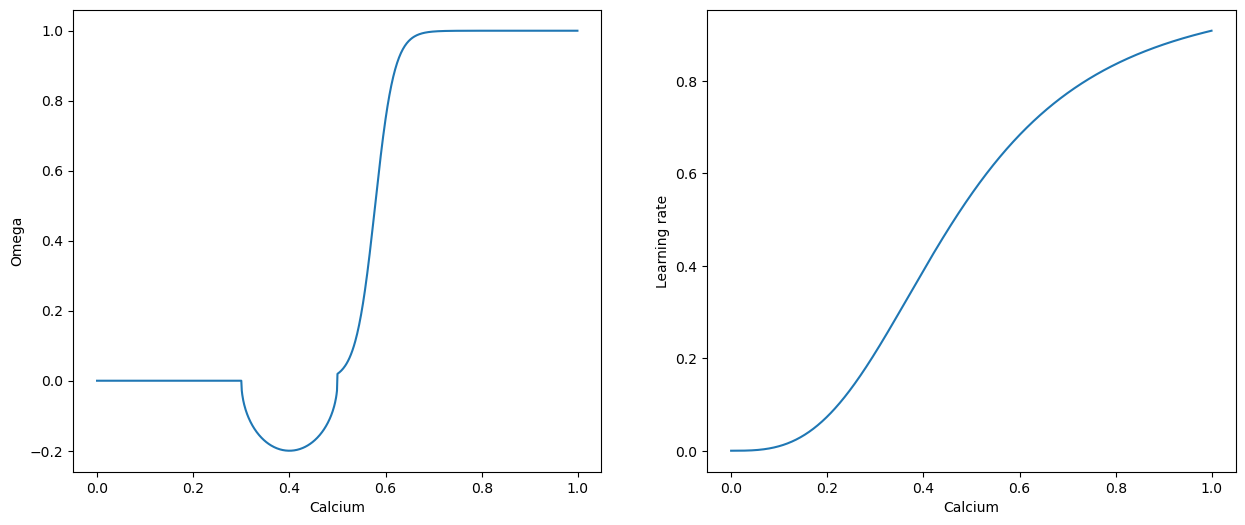

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

def eta(cai):
    P1 = 0.1
    P2 = P1*1e-4
    P4 = 1
    Cacon = cai
    taulearn = P1/(P2+Cacon*Cacon*Cacon)+P4
    eta = 1/taulearn*0.001
    return eta

temp_cai = np.arange(0,1,0.001)

rate_array = []
for i in range(len(temp_cai)):
    rate = eta(temp_cai[i])
    rate = rate * 1000
    rate_array.append(rate)

def omega(Cai, threshold1, threshold2,learn_factor=-50): #default is -50
    Cacon = Cai
    r = (threshold2-threshold1)/2
    mid = (threshold1+threshold2)/2
    if (Cacon <= threshold1): 
        omega = 0
    elif (Cacon >= threshold2): 
        omega = 1/(1+50*np.exp(learn_factor*(Cacon-threshold2)))
    else: 
        omega = -np.sqrt(r*r-(Cacon-mid)*(Cacon-mid))*2
    return omega

temp_omega = []
for i in range(len(temp_cai)):
    var_omega = omega(Cai=temp_cai[i],threshold1=0.3,threshold2=0.5)
    temp_omega.append(var_omega)


axs[0].plot(temp_cai,temp_omega)
axs[0].set_ylabel('Omega')
axs[0].set_xlabel('Calcium')
axs[1].plot(temp_cai,rate_array)
axs[1].set_ylabel('Learning rate')
axs[1].set_xlabel('Calcium')
plt.show()
